In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
! pip install textblob
! pip install wordcloud
#! pip install pyabsa

In [2]:
import spacy.cli

spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [3]:
#IMPORTING REQUIRED LIBRARIES
import warnings 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import re
import json 
import nltk
#nltk.download('all')
import spacy
import string
import unicodedata
from bs4 import BeautifulSoup
from textblob import TextBlob 
from nltk.stem import WordNetLemmatizer
from spacy.lang.en.stop_words import STOP_WORDS


nlp= spacy.load('en_core_web_sm')
nlp= spacy.load('en_core_web_lg')

from IPython import display 
display.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')

from statistics import mode
from collections import Counter 

C:\Users\vinit\AppData\Local\Temp/ipykernel_11384/1428068157.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [4]:
## IMPORT DATA IN PANDAS

vgames_review_df = pd.read_json("D:\AN_V\CAPTSTONE PROJECT\Video_Games_5.json", orient='records', lines=True)
toys_review_df = pd.read_json("D:\AN_V\CAPTSTONE PROJECT\Toys_and_Games_5.json", orient='records', lines=True)
vgames= vgames_review_df.copy()
toys = toys_review_df.copy()


II. Preliminary Analysis

In [5]:
## CHECK DATA IN PANDAS
# DEFINING FUNCTION FOR DATA CHECK

def datacheck(text):
    print ("================================================")
    # change column name 
    text = text.rename(columns={'overall': 'Rating'})

    print ("Total dataset:", str(text.shape))
    print()
    
    ### Total reviews
    total = len(text)
    print ("Number of reviews: ",total)
    print ()

    ### How many unique reviewers?
    print ("Number of unique reviewers: ",len(text.reviewerID.unique()))
    reviewer_prop = float(len(text.reviewerID.unique())/total)
    print ("Prop of unique reviewers: ",round(reviewer_prop,3))
    print ()

    ### How many unique products?
    print ("Number of unique products: ", len(text.asin.unique()))
    product_prop = float(len(text.asin.unique())/total)
    print ("Prop of unique products: ",round(product_prop,3))
    print ()

    ### Average star score
    print ("Average rating score: ",round(text.Rating.mean(),3))

    print ("================================================")
    print()
    return text.head()

In [6]:
# check whehter it's having null values or not
## dropping a unwanted columns

def null(text):
    print(text.isnull().sum())
    text.drop(text.columns[[ 2,3, 7]], axis = 1, inplace = True)  #removing unwanted columns
    text['reviewTime']=pd.to_datetime(text['reviewTime'])   #converting to the date time format of review time column
    text['Reviews_orignal'] =text['reviewText'].copy()
    text['reviewText + summary'] = text['reviewText']+" "+text["summary"]    #merging review text & summary to get single output
    text.drop(text.columns[4], axis = 1, inplace = True)  #removing summary columns

II. Pre-processing —— Text Normalization (Text Wrangling)


Text normalization is defined as a process that consists of a series of steps that should be followed to wrangle, clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input. Besides tokenization, various other techniques include cleaning text, case conversion, correcting spellings, removing stopwords and other unnecessary terms, stemming, and lemmatization. Text normalization is also often called text cleansing or wrangling.

Below are various techniques used in the process of text normalization:

    Cleaning Text
    Removing punctuation
    Removing html tags
    Removing Special Characters
    Removing Emails
    Case Conversions
    Removing Stopwords
    Removing Extra Spaces



In [7]:
def clean_text(text):
    text = text.str.lower()  # lowering the case!
    text = text.apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))  # it removes the punctuation 
    text = text.apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )  # remove stopwords!
    text = text.apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x))) # remove url and tags! 
    text = text.apply(lambda x: BeautifulSoup(x, 'lxml').get_text())  #remove html tags!
    text = text.apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails 
    text = text.apply(lambda x: " ".join(x.split())) # remove extra spaces
    
    return text

In [8]:
#DEFINING FUNCTION FOR POLARITY 
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
    

In [9]:
#DEFINING FUNCTION FOR SENTIMENT ANALYSIS 
def getanalysis(score):
    if score < 0:
        return "Negative"
    elif score > 0.5:
        return "Highly Positive"
    elif score < 0.6 and score > 0 :
        return "Positive"
    else:
        return "Neutral"
        

## Dataset - Toys and Games 

In [10]:
#CHECK DATA IN PANDAS 

datacheck(toys_review_df)

Total dataset: (167597, 9)

Number of reviews:  167597

Number of unique reviewers:  19412
Prop of unique reviewers:  0.116

Number of unique products:  11924
Prop of unique products:  0.071

Average rating score:  4.356



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


In [11]:
#CHECK FOR NULL VALUES AND DROPPING UNWANTED COLUMNS
null(toys_review_df)

reviewerID          0
asin                0
reviewerName      838
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64


In [13]:
#CALLING CLEAN_TEXT FUNCTION 

toys_review_df["reviewText"]=clean_text(toys_review_df["reviewText"])
print("The final dataset of Toys and Games are after data preprocessing : ")
print()
toys_review_df.head()

#to save file into csv
#df1.to_csv('/Users/emineakbulut/Desktop/capstone project 2/data/cleaned_review_health_and_personal_care.csv', sep = ',', encoding = 'utf-8', index = False)


The final dataset of Toys and Games are after data preprocessing : 



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary
0,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...
1,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...
2,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...
3,AR29QK6HPFYZ4,0439893577,bought years ago daughter loves today holidays...,5,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...
4,ACCH8EOML6FN5,0439893577,stainless steel refrigerator space son play ma...,4,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...


In [14]:
#APPLYING POLARITY SCORES WITH RESPECT TO REVIEWS 
toys_review_df["reviewPolarity"] = toys_review_df["reviewText + summary"].apply(getpolarity)

#CATEGORISING SENTIMENTS ACCORDING TO POLARITY SCORES
toys_review_df["reviewAnalysis"] =toys_review_df["reviewPolarity"].apply(getanalysis)
print("Here the Sentiment analysis of each review : ")
print()
toys_review_df

Here the Sentiment analysis of each review : 



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A1VXOAVRGKGEAK,0439893577,like item pricing granddaughter wanted mark wa...,5,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,A8R62G708TSCM,0439893577,love magnet easel great moving different areas...,4,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.375000,Positive
2,A21KH420DK0ICA,0439893577,sides magnetic real plus youre entertaining ch...,5,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.375000,Positive
3,AR29QK6HPFYZ4,0439893577,bought years ago daughter loves today holidays...,5,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...,0.333333,Positive
4,ACCH8EOML6FN5,0439893577,stainless steel refrigerator space son play ma...,4,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...,0.425000,Positive
...,...,...,...,...,...,...,...,...,...
167592,A18Q24BZK2CB5P,B00LBI9BKA,drone fun super duarable easy use kids love de...,5,2014-07-07,This drone is very fun and super duarable. Its...,This drone is very fun and super duarable. Its...,0.460333,Positive
167593,A1I8ON1X0B2N2W,B00LBI9BKA,brothers prized toy extremely durable performs...,5,2014-07-07,This is my brother's most prized toy. It's ext...,This is my brother's most prized toy. It's ext...,0.196282,Positive
167594,A3V24H5350ULKI,B00LBI9BKA,panther drone toy awesome definitely recommend...,5,2014-07-08,This Panther Drone toy is awesome. I definitel...,This Panther Drone toy is awesome. I definitel...,0.348016,Positive
167595,A1W2F1WI0QZ4AJ,B00LBI9BKA,drone proven excellent choice drone obviously ...,5,2014-07-18,This is my first drone and it has proven to be...,This is my first drone and it has proven to be...,0.337121,Positive


In [15]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
toys_review_df["reviewAnalysis"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Toys and Games(%)", fontsize=15)
plt.show()

KeyError: 'reviewAnalysis'

<Figure size 720x432 with 0 Axes>

In [16]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = toys_review_df["reviewAnalysis"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Toys and Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

KeyError: 'reviewAnalysis'

<Figure size 720x432 with 0 Axes>

In [17]:
#ACCURACY CHECK 

toys_review_df_sample = toys_review_df.sample(n=10, random_state=21)   #taking samples from the model to visually check the accuracy
Accuracy_df=pd.DataFrame()
original_review=[]
true_label= []
Predicted_label= []
for i in range(0,10):
    print("Review : ",toys_review_df_sample["Reviews_orignal"].iloc[i])
    print("Sentiment : ",toys_review_df_sample["reviewAnalysis"].iloc[i] )
    true_label.append(str(input("Enter your views about the Text (Positive/Negative): ")))
    print("-----------")
    original_review.append(toys_review_df_sample["Reviews_orignal"].iloc[i])
    Predicted_label.append(toys_review_df_sample["reviewAnalysis"].iloc[i])
    print("")
Accuracy_df["original_review"]= original_review
Accuracy_df["true_label"]= true_label
Accuracy_df["predicted_label"]= Predicted_label    
Accuracy_df.head()

Review :  I'm actually considering buying a second set. These are super cool looking, well crafted, and sturdy enough to bookend some very thick manuals, lol. I started using them for my cookbooks but then realized the folly of not using them for my video games, and so I rectified that situation, lol. Anyway, if you're looking at these, then you already have played Portal 2 or know somebody who has. You wont be disappointed. In a sense, with regards to these bookends, the cake is NOT a lie. :)


KeyError: 'reviewAnalysis'

In [ ]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
review_vector=[]

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(toys_review_df["reviewText + summary"])
# summarize
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
# encode document
for i in toys_review_df["reviewText + summary"]:
    vector = vectorizer.transform([i])
    review_vector.append(vector.toarray())

#vector = vectorizer.transform([i for i in toys_review_df["reviewText + summary"]])
# summarize encoded vector
#print(vector.shape)
#review_vector.append(vector.toarray())
#print(vector)
toys_review_df["review_vector"]= review_vector
toys_review_df.head()

In [ ]:
from sklearn.cluster import DBSCAN
knihhimport numpy as np
>>> X = np.array([[1, 2], [2, 2], [2, 3],
...               [8, 7], [8, 8], [25, 80]])
>>> clustering = DBSCAN(eps=3, min_samples=2).fit(X)
>>> clustering.labels_
array([ 0,  0,  0,  1,  1, -1])
>>> clustering
DBSCAN(eps=3, min_samples=2)

### INTERPRETATION : From above analyse, it gives the accuracy of 90% for review text sentiment analysis. 

**TASK 1.3 - Find the reason of negative reviews for product highest number of negative reviews**

In [ ]:
toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative")]["asin"].mode()

0    B004S8F7QM
dtype: object

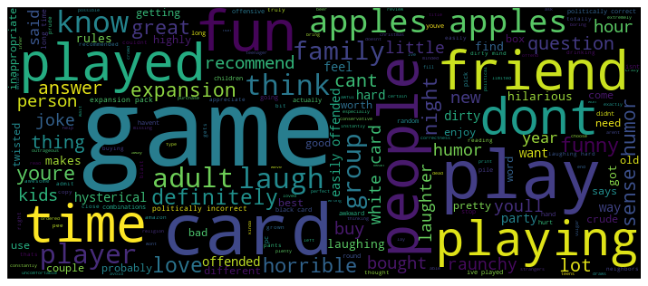

In [ ]:
negative_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative") & (toys_review_df["asin"]=="B004S8F7QM")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:

from pyabsa import available_checkpoints
# ATEPC >> Aspect Term Extraction Polarity Classification
from pyabsa import ATEPCCheckpointManager
aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',auto_device=True)

This script could only be used to manage NVIDIA GPUs,but no GPU found in your device
********** Available ATEPC model checkpoints for Version:1.16.14 (this version) **********
----------------------------------------------------------------------------------------------------
Checkpoint Name: english
id: 
Training Model: FAST-LCFS-ATEPC
Training Dataset: English
Language: English
Description: Trained on RTX3090, this checkpoint use bert-spc in ATEPC training
Available Version: 1.16.0+
Checkpoint File: fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip
Author: H, Yang (yangheng@m.scnu.edu.cn)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Checkpoint Name: chinese
id: 
Training Model: FAST-LCF-ATEPC
Training Dataset: Chinese
Language: Chinese
Description: Trained on RTX3090 BERT-BASE-CHINESE
Available Version: 1.16.0+
C

577MB [00:27, 21.02MB/s, Downloading checkpoint...]                         

Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip, unzipping...


Done.
If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA-ATEPC/resolve/main/checkpoint/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_85.4_apcf1_82.53_atef1_80.19.zip 
Load aspect extractor from ./checkpoints/ATEPC_ENGLISH_CHECKPOINT
config: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.config
state_dict: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.state_dict
model: None
tokenizer: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc.tokenizer


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.dense.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.7/dist-packages/transformers/convert_slow_tokenizer.py:435: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Config used in Training:
ABSADatasetsVersion:None	-->	Calling Count:0
IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:1
MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x7f1714288710>	-->	Calling Count:0
PyABSAVersion:1.15.7	-->	Calling Count:0
SRD:3	-->	Calling Count:79070
TorchVersion:1.10.0+cuda11.3	-->	Calling Count:0
TransformersVersion:4.20.1	-->	Calling Count:0
auto_device:True	-->	Calling Count:50569
batch_size:16	-->	Calling Count:5
cache_dataset:True	-->	Calling Count:1
dataset_file:{'train': ['integrated_datasets/atepc_datasets/110.SemEval/113.laptop14/Laptops_Train.xml.seg.atepc', 'integrated_datasets/atepc_datasets/110.SemEval/114.restaurant14/Restaurants_Train.xml.seg.atepc', 'integrated_datasets/atepc_datasets/110.SemEval/116.restaurant16/restaurant_train.raw.atepc', 'integrated_datasets/atepc_datasets/101.ACL_Twitter/acl-14-short-data/train.raw.atepc', 'integrated_datasets/atepc_datasets/109.MAMS/train.xml

In [ ]:
reasons=[]
for i in negative_df['Reviews_orignal']:
      reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))


In [ ]:
print("The reasons for negative reviews of the most popular negative product of Toys and Games category are : Card Quality, Poor Replay, Adult theme.")

**EXTRACTING PRODUCT NAMES FROM TEXT IN DATASET (TOYS AND GAMES)**

In [ ]:
prd_id=[]
product_name=[]
c=1
for j in toys_review_df.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=toys_review_df[toys_review_df['asin']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
                  count.append(w.text)
            if w.label_=="ORG":
                  count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")
print()  
toys_product_names=pd.DataFrame()
toys_product_names["ASIN Code"]=prd_id
toys_product_names["Product Name"]= product_name
toys_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 



,ASIN Code,Product Name
0,0439893577,Magnetic
1,048645195X,Marty Noble
2,0545496470,games.NA
3,0615444172,games.NA
4,0670010936,Llama Llama
5,0735308365,ABC
6,0735321396,WONDERFUL!He
7,073533305X,Mudpuppy
8,0735333483,Melissa
9,073533417X,Mudpuppy


## Dataset - Video games

In [ ]:
#CHECK DATA IN PANDAS 
datacheck(vgames_review_df)

Total dataset: (232483, 9)

Number of reviews:  232483

Number of unique reviewers:  24303
Prop of unique reviewers:  0.105

Number of unique products:  10672
Prop of unique products:  0.046

Average rating score:  4.086



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4,DIRT 3,1308009600,"06 14, 2011"


In [ ]:
#CHECK FOR NULL VALUES AND DROPPING UNWANTED COLUMNS
null(vgames_review_df)

reviewerID           0
asin                 0
reviewerName      2814
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64


In [ ]:
vgames_review_df["reviewText"] = clean_text(vgames_review_df["reviewText"])

print("The final dataset of Video Games are after data preprocessing : ")
print()
vgames_review_df.head()

#to save file into csv
#df1.to_csv('/Users/emineakbulut/Desktop/capstone project 2/data/cleaned_review_health_and_personal_care.csv', sep = ',', encoding = 'utf-8', index = False)


The final dataset of Video Games are after data preprocessing : 



,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary
0,A2HD75EMZR8QLN,0700099867,installing game struggle games windows live bu...,1,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...
1,A3UR8NLLY1ZHCX,0700099867,like rally cars game funit oriented 34european...,4,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...
2,A1INA0F5CWW3J4,0700099867,1st shipment received book instead game2nd shi...,1,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...
3,A1DLMTOTHQ4AST,0700099867,got version instead ps3 version turned mistake...,3,2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,..."
4,A361M14PU2GUEG,0700099867,dirt 2 xbox 360 okay game started playing game...,4,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...


In [ ]:
#APPLYING POLARITY SCORES WITH RESPECT TO REVIEWS 
vgames_review_df["reviewPolarity"] = vgames_review_df["reviewText"].apply(getpolarity)

#CATEGORISING SENTIMENTS ACCORDING TO POLARITY SCORES
vgames_review_df["reviewAnalysis"] =vgames_review_df["reviewPolarity"].apply(getanalysis)
vgames_review_df

,reviewerID,asin,reviewText,overall,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A2HD75EMZR8QLN,0700099867,installing game struggle games windows live bu...,1,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,A3UR8NLLY1ZHCX,0700099867,like rally cars game funit oriented 34european...,4,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive
2,A1INA0F5CWW3J4,0700099867,1st shipment received book instead game2nd shi...,1,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...,-0.200000,Negative
3,A1DLMTOTHQ4AST,0700099867,got version instead ps3 version turned mistake...,3,2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,...",-0.021147,Negative
4,A361M14PU2GUEG,0700099867,dirt 2 xbox 360 okay game started playing game...,4,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...,0.233766,Positive
...,...,...,...,...,...,...,...,...,...
232478,A1ICREREXO9J81,B00KHECZXO,funny people rating sellers ripping supposedly...,5,2014-07-20,Funny people on here are rating sellers that a...,Funny people on here are rating sellers that a...,0.408333,Positive
232479,A3VVMIMMTYQV5F,B00KHECZXO,deluxe 32gb wii u mario kart 8 separately 350t...,1,2014-06-21,All this is is the Deluxe 32GB Wii U with Mari...,All this is is the Deluxe 32GB Wii U with Mari...,0.031429,Positive
232480,A1DD4B97M4DUC5,B00KHECZXO,package red steering wheel retail value 330 42...,1,2014-05-29,The package should have more red on it and sho...,The package should have more red on it and sho...,0.025000,Positive
232481,A2Q9CNJ4T6ZK99,B00KHECZXO,newegg 32900 packaging alittle arrived box red,1,2014-06-02,Can get this at Newegg for $329.00 and the pac...,Can get this at Newegg for $329.00 and the pac...,0.000000,Neutral


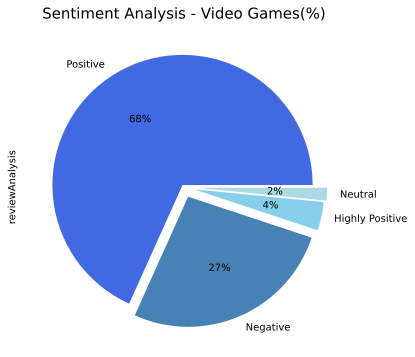

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
vgames_review_df["reviewAnalysis"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Video Games(%)", fontsize=15)
plt.show()

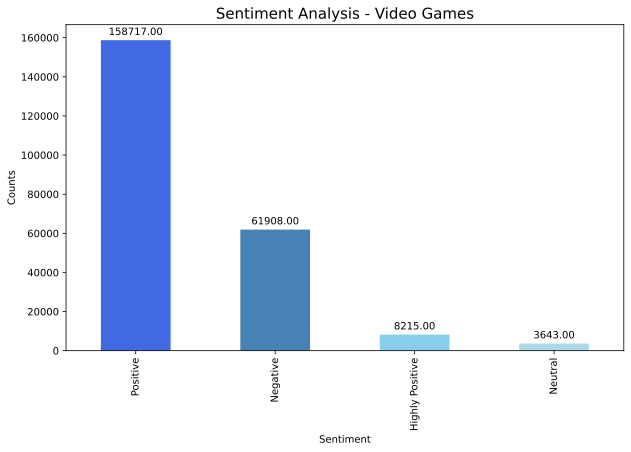

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = vgames_review_df["reviewAnalysis"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Video Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [ ]:
#ACCURACY CHECK 

vgames_review_df_sample = vgames_review_df.sample(n=10, random_state=21)   #taking samples from the model to visually check the accuracy

for i in range(0,10):
    print("Review : ",vgames_review_df_sample["reviewText"].iloc[i])
    print("Sentiment : ",vgames_review_df_sample["reviewAnalysis"].iloc[i] )
    print("-----------")

Review :  played metro 2033 loved metro light comes im excited pick left offnow im quarter way light games play cant buy game release date coming saturday im ready beat daynope im train beginning im walking check items im hopping messing buttons find outside train movingi went window stops time im stuck im able walk forth train cant restart turn game come day laterjust glitch biggiedoes bother kind stuff happens im playing like close combat shotty im blasting guys left right find shotgun strong knocks wall standing near brick steel shotgun disappear wall half leg sticking shaking crap gamethe game fun eerie moments thing noticed place place npc characters addressing fine barely met told namenow know know isolated areas biggie noticed graphics pretty good great overall im satisfied game waited price drop right id game 810 edit 525 ive playing hour day review able finish slight frustration lets start bit repetitive games like going place place etc thats reason frustration time time die g

### INTERPRETATION : From above analyse, it gives the accuracy of 90% for review text sentiment analysis. 

**TASK 1.3 - Find the reason of negative reviews for product highest number of negative reviews**

In [ ]:
vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative")]["asin"].mode()

0    B00178630A
dtype: object

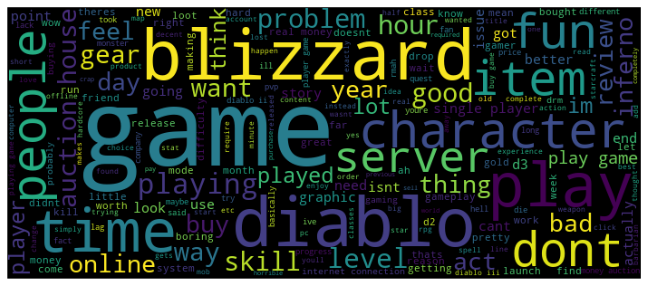

In [ ]:
negative_df=vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative") & (vgames_review_df["asin"]=="B00178630A")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

In [ ]:
#ALSO EXTRACTING THE REASONS WITH ASPECT EXTRACTOR METHOD

reasons=[]
for i in negative_df['Reviews_orignal']:
  reasons.append(aspect_extractor.extract_aspect(inference_source=[i], pred_sentiment=True))

/usr/local/lib/python3.7/dist-packages/transformers/models/deberta_v2/modeling_deberta_v2.py:542: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bucket_pos = np.where(abs_pos <= mid, relative_pos, log_pos * sign).astype(np.int)


The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: Diablo 3 has been fun , but Mac users beware - - while Blizzard says this game is supported for the Mac , any Mac with the Nvidia 9400M video card ( which is many Macbooks , including my 2010 13in Macbook Pro ) will NOT play the game satisfactorily . Even on the lowest graphic settings the game is too sluggish to play ( 5 - 10 FPS ) . At the beginning of the game this lag seems tolerable when there are only a few monsters on the screen , but as you progress into more advanced acts the game slows down to the point where all you do is die to unseen hordes stuttering around the screen . This looks like a fun game , but now I ' ve been forced to buy a new computer or ask for a refund - - it simply cannot play on Macs with Nvidia 9400M cards ! Wait to see if Blizzard fixes this , and the game might be cheaper by then too .
The results of aspect term extraction have been saved in /content

/usr/local/lib/python3.7/dist-packages/pyabsa/core/atepc/prediction/aspect_extractor.py:408: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  probs = [float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()]


The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: No <offline mode:Negative Confidence:0.9995793700218201> how pathetic . . . . Internet connection is mandatory and Blizzard guess what ? You are not getting ANY money from me until this game is offline , I want to play it without an internet connection , not everyone has an internet connection all the time . Pathetic .
The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: Diablo 3 has been one of those games that has been labelled as garbage and it ' s really a shame . I believe there are three main complaints against the game : 1 ) Real Money Auction HousePeople feel that this breaks the game because others can come in with real money , do half the work , and be ready to take on the mobs in Inferno . First off , no . You can have the BEST gear in the game , and still get your butt handed to you in Inferno , even with the recent pat

In [ ]:
print("The reasons for negative reviews of the most popular negative product are : Server and Installing.")

**PRODUCT NAME RECOMMENDATION**

In [ ]:
prd_id=[]
product_name=[]
c=1
for j in vgames_review_df.asin.unique()[:50]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=vgames_review_df[vgames_review_df['asin']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PERSON':
              count.append(w.text)
            if w.label_=="ORG":
              count.append(w.text)
          
    if count==[]:
      product_name.append("games.NA")
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 ASIN code and their respective product names : ")  
vgames_product_names=pd.DataFrame()
vgames_product_names["ASIN Code"]=prd_id
vgames_product_names["Product Name"]= product_name
vgames_product_names.head(20)

Here are the list of first 20 ASIN code and their respective product names : 


,ASIN Code,Product Name
0,0700099867,Codemasters
1,6050036071,appearance!Really
2,7100027950,Nintendo
3,7293000936,Wii
4,8176503290,Hawx
5,907843905X,the Creator's Forum
6,9625990674,Black Silicone
7,9861019731,Gamecube
8,9882155456,Gamecube
9,B000003SQQ,Frosty


**RELATION/BUYING TRENDS BETWEEN COMMON CUSTOMERS**

In [ ]:
#FINDING THE LIST OF COMMON CUSTOMERS IN BOTH CATEGORIES

common= (vgames_review_df.merge(toys_review_df, how="inner", on="reviewerID"))["reviewerID"].unique()
common

In [ ]:
#EXTRACTING THE DATA OF COMMON CUSTOMERS FROM BOTH CATEGORY

vgames_common_df=(vgames_review_df[vgames_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
vgames_common_df=vgames_common_df.set_index((vgames_common_df["reviewTime"]))
vgames_common_df =vgames_common_df['reviewerID'].resample('M').count()



toys_common_df=(toys_review_df[toys_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
toys_common_df=toys_common_df.set_index((toys_common_df["reviewTime"]))
toys_common_df=toys_common_df['reviewerID'].resample('M').count()


In [ ]:
#EXTRACTING THE DATA OF UNCOMMON CUSTOMERS FROM BOTH CATEGORY

vgames_not_common_df=(vgames_review_df[~vgames_review_df["reviewerID"].str.contains('|'.join(common) ,na=False) ])
vgames_not_common_df=vgames_not_common_df.set_index((vgames_not_common_df["reviewTime"]))
vgames_not_common_df =vgames_not_common_df['reviewerID'].resample('M').count()



toys_not_common_df=(toys_review_df[~toys_review_df["reviewerID"].str.contains('|'.join(common), case=True) ])
toys_not_common_df=toys_not_common_df.set_index((toys_not_common_df["reviewTime"]))
toys_not_common_df=toys_not_common_df['reviewerID'].resample('M').count()

In [ ]:
vgames_not_common_df

In [ ]:
vgames_common_df=(vgames_review_df[vgames_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
vgames_common_df=vgames_common_df.set_index((vgames_common_df["reviewTime"]))
vgames_common_pos = pd.DataFrame(vgames_common_df[vgames_common_df['reviewAnalysis']=="Positive"]["reviewerID"].resample('M').count())
vgames_common_neg = pd.DataFrame(vgames_common_df[vgames_common_df['reviewAnalysis']=="Negative"]["reviewerID"].resample('M').count())
vgames_common_neu = pd.DataFrame(vgames_common_df[vgames_common_df['reviewAnalysis']=="Neutral"]["reviewerID"].resample('M').count())
vgames_common_pos["Category"]= "Video Games"
vgames_common_neg["Category"]= "Video Games"
vgames_common_neu["Category"]= "Video Games"



toys_common_df=(toys_review_df[toys_review_df["reviewerID"].str.contains('|'.join(common), case=False) ])
toys_common_df=toys_common_df.set_index((toys_common_df["reviewTime"]))
toys_common_pos = pd.DataFrame(toys_common_df[toys_common_df['reviewAnalysis']=="Positive"]["reviewerID"].resample('M').count())
toys_common_neg = pd.DataFrame(toys_common_df[toys_common_df['reviewAnalysis']=="Negative"]["reviewerID"].resample('M').count())
toys_common_neu = pd.DataFrame(toys_common_df[toys_common_df['reviewAnalysis']=="Neutral"]["reviewerID"].resample('M').count())
toys_common_pos["Category"]= "Toys and Games"
toys_common_neg["Category"]= "Toys and Games"
toys_common_neu["Category"]= "Toys and Games"


In [ ]:
#FINAL DATA
#CONCATENATING BOTH CATEGORIES ON THE BASES OF SENTIMENTS

common_pos= pd.concat([vgames_common_pos,toys_common_pos], axis=0)
common_neg= pd.concat([vgames_common_neg,toys_common_neg], axis=0)
common_neu= pd.concat([vgames_common_neu,toys_common_neu], axis=0)

In [ ]:
sns.scatterplot(x=common_pos[common_pos.index==2014%d], y= common_pos["reviewerID"], hue=common_pos["Category"])

TypeError: ignored

In [ ]:
#PLOTTING THE GRAPH FOR OUTPUT VALUES import seaborn as sns

plt.figure(figsize=(15,8))
sns.lineplot(x=vgames_common_pos.index, y = vgames_common_pos["reviewerID"], hue=vgames_common_pos.Category, color="blue")
sns.lineplot(x=toys_common_pos.index, y = toys_common_pos["reviewerID"], hue=toys_common_pos.Category, color = "red")
plt.title("Trend of positive reviews of common customers", fontsize=16)
plt.xlabel("Time Period")
plt.ylabel("Count of Reviewer ID")
plt.show()


In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=vgames_common_neg.index, y = vgames_common_neg["reviewerID"], hue=vgames_common_neg.Category, color="blue")
sns.lineplot(x=toys_common_neg.index, y = toys_common_neg["reviewerID"], hue=toys_common_neg.Category, color = "red")
plt.title("Trend of Negative reviews of common customers", fontsize=16)
plt.xlabel("Time Period")
plt.ylabel("Count of Reviewer ID")
plt.show()

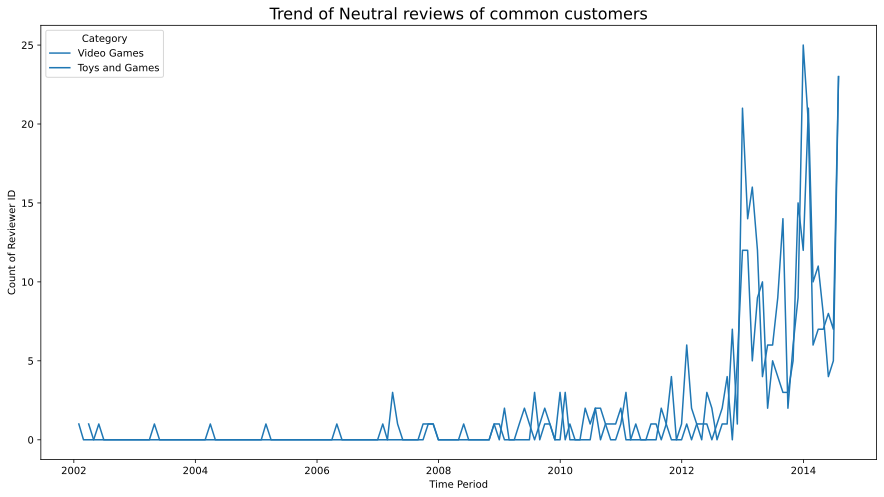

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x=vgames_common_neu.index, y = vgames_common_neu["reviewerID"], hue=vgames_common_neu.Category, color="blue")
sns.lineplot(x=toys_common_neu.index, y = toys_common_neu["reviewerID"], hue=toys_common_neu.Category, color = "red")
plt.title("Trend of Neutral reviews of common customers", fontsize=16)
plt.xlabel("Time Period")
plt.ylabel("Count of Reviewer ID")
plt.show()

TypeError: ignored

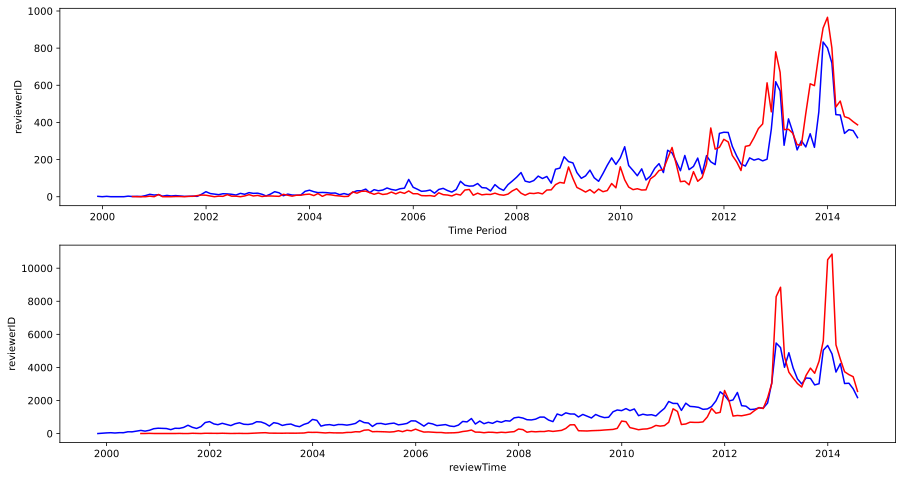

In [ ]:
figure, ax= plt.subplots(2,1,figsize=(15,8))
sns.lineplot(x=vgames_common_df.index, y = vgames_common_df, color="blue", ax=ax[0])
sns.lineplot(x=toys_common_df.index, y = toys_common_df, color="red",ax=ax[0])

sns.lineplot(x=vgames_not_common_df.index, y = vgames_not_common_df, color="blue", ax=ax[1])
sns.lineplot(x=toys_not_common_df.index, y = toys_not_common_df, color="red",ax=ax[1])

ax=ax[0].set_xlabel("Time Period")
#ax=ax[0].set_ylabel("Count of Reviewer ID")
ax=ax[0].set_title("Review trends of Common customers")
plt.show()

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in (toys_review_df[toys_review_df.asin=="074242720X"]["reviewText"])])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()